In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math, random

# Probability and Random Signals

1. Random Processes & White noise
2. Autocorrelation & Cross-Correlation
3. Power Spectral Density (PSD)
4. Gaussian & Non-Gaussian Signals

### Tasks:
- Generate whitenoise and analyze its power spectrum
- Implement an autocorrelation function and compare it with FFT-based methods

## Random Processes - Gubner 10.2

**Random process** is a family of random variables, wjere random variables are functions defined on a sample space $\Omega$.

**Discrete-time random process** is a family of random variables ${X_n}$ where $n$ ranges over a specified subset of the integers. For function variable $\omega$, there are two divisions:

1. For fixed $n$, $X_n(\omega)$ is a function of $\omega$ and a random variable.
2. For fixed $\omega$ we get a sequence of numbers $X_1(\omega)$, $X_2(\omega)$... this is called a sample function of the random process.

**Continuous-time random process** is a family of random variables ${X_t}$ where $t$ ranges over a specified interval of time.

## Autocorrelation & Cross Correlation

For a single random variable $X$, once we know its probability mass function or probability density function, we can write down a sum or integral expression for $P(X\in B)$ or $E[g(X)]$ for any set $B$ or function $g$. Similarly for a pair of random variables $(X,Y)$ there are $P((X,Y)\in A)$ or $E[h(X,Y)]$ for any 2D set $A$ or bivariate function $h$.

A random process $X_t$ is completely characterized once we say how to compute for every $1\leq n<\infty$:

$$P((X_{t_1},...,X_{t_n}) in B) $$

for arbitrary $n$-dimensional sets $B$ and distinct times $t_1$,...,$t_n$. However we usually don't have this infor,ation and must estimate it from the data. We usually have the mean, variance, and correlation $E[XY]$.

If $X_t$ is a random process, then for every value of $t$, $X_t$ is a random variable with mean $E[X_t]$. The **mean function** of the process is:

$$ m_X(t) := E[X_t] $$

This is the average behavior of the process with time. If $X_{t_1}$ and $X_{t_2}$ are two random variables of a process $X_t$, their **auto-correlation** or **correlation function** is:

$$R_X(t_1,t_2) := E[X_{t_1}X_{t_2}] $$

The covariance function is:

$$ C_X(t_1,t_2) := E[(X_{t_1}-E[X_{t_1}])(X_{t_2}-E[X_{t_2}])] = R_X(t_1,t_2) - m_X(t_1)m_X(t_2)$$

Letting $X_t$ and $Y_t$ be random processes. Their **corss-correlation** function is:

$$ R_{XY}(t_1,t_2) := E[X_{t_1}Y_{t_2}] $$

Likewise, the cross-covariance function is:

$$ C_{XY}(t_1,t_2) := E[(X_{t_1}-E[X_{t_1}])(Y_{t_2}-E[Y_{t_2}])] = R_{XY}(t_1,t_2) - m_X(t_1)m_Y(t_2)$$


### Wide-sense stationarity (WSS)

A process is WSS if:

1. The mean function $E[X_t]$ does not depend on $t$
2. The auto-correlation $E[X_{t_1}X_{t_2}]$ depends on $t_1$ and $t_2$ only through the time difference $t_1 - t_2$

In typical problems we do not have the autocorrelation but must estimate it from the data. Suppose we have a discrete WSS process $X_k$. The expectation of 

$$\frac{1}{2N+1}\sum_{k=-N}^N X_{k+n}X_k \Rightarrow \frac{1}{2N+1}\sum_{k=-N}^N E[X_{k+n}X_k] = R_X(n) $$

This is the time-averaged estimate of auto-correlation. This works if the time window is large enough and the process is ergodic. Ergodicity is the property of a random process where time averages (over one realization) are equal to ensemble averages (over many realizations).That is, one can learn the full statistical behavior of a random process by just observing a single, long-enough realization — if the process is ergodic.

### Transforms of correlation functions

The Fourier/Inverse-Fourier Transform of $R_X(\tau)$ is:

$$S_X(f) := \int_{-\infty}^{\infty}R_X(\tau)e^{-j2\pi f\tau} d\tau \Leftrightarrow R_X(\tau) := \int_{-\infty}^{\infty}S_X(f)e^{j2\pi f\tau} df$$ 

The transform $S_X(f)$ is **real, even, and non-negative**. For discrete-time WSS process $X_n$ with correlation function $R_X(n)=E[X_{k+n}X_k]$:

$$S_X(f) := \sum_{n=-\infty}^{\infty} R_X(n)e^{-j2\pi fn}\Leftrightarrow R_X(n) := \int_{-1/2}^{1/2}S_X(f)e^{j2\pi fn} df$$

### WSS Processes through LTI Systems

If a WSS process $X_t$ is applied to an LTI system with impulse response $h$ then the output

$$T_t = \int_{-\infty}^{\infty}h(t-\theta)X_{\theta}d\theta $$
is also a WSS process. The auto-correlation of $Y_t$ and the corss correlation of $X_t$, $Y_t$ can be expressed in terms of convolutions of $h$ and $R_X$. 

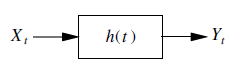

### Time-domain analysis

The response of an LTI system to a WSS input is another WSS process with auto-correlation function:

$$ R_Y(\tau) = \int_{-\infty}^{\infty}h(\beta)\left( \int_{-\infty}^{\infty}h(\theta)R_X(\tau-\beta+\theta)\,d\theta \right) $$

If two process $X_t$ and $Y_t$ are each WSS, and if their cross-correlation $E[X_{t_1}Y_{t_2}]$ depends on $t_1$ and $t_2$ only through their difference, the process are said to be jointly-WSS (J-WSS). Their univariate cross-correlation function is:

$$R_{XY}(\tau) := E[X_{t+\tau}Y_{t}] $$
generalizing 

$$E[X_{t_1}Y_{t_2}] = R_{XY}(t_1-t_2)$$

### Frequency-domain analysis

By applying the Fourier transform, a much simpler formula is available in the frequency domain. The Fourier transform of the system impulse response $h$:

$$ H(f) := \int_{-\infty}^{\infty} h(\tau) e^{-j2\pi f \tau} \,d\tau $$

is called the system **transfer function**. It can be shown that:

$$S_{XY}(f) = H(f)^*S_X(f) $$ 

and

$$S_Y(f) = H(f)S_{XY}(f) $$

therefore:

$$S_Y(f) = |H(f)|^2S_X(f) $$

## Power Spectral Density

For a deterministic signal $x(t)$, the energy or average power is a single number characterization. For a random process $X_t$, the analogous quantities:

$$ \int_{-\infty}^{\infty} X_t^2 dt \quad \lim_{T\rightarrow\infty}\frac{1}{2T}\int_{-T}^{T} X_t^2dt$$

are random variables (excepting for ergodic behavior). But, their expectation values are single number characterizations. WSS processes typically have infinite expected energy, but not **expected average power**.

$$ P_X:=E\left[ \lim_{T\rightarrow\infty}\frac{1}{2T}\int_{-T}^{T} X_t^2dt\right] \Rightarrow \lim_{T\rightarrow\infty}\frac{1}{2T}\int_{-T}^{T}R_X(0)dt=R_X(0)$$

Equivalently, this is saying to express the power for a WSS process:

\begin{equation}
    P_X = E[X_t^2] = R_X(0) = \int_{-\infty}^{\infty} S_X(f)\,df
\end{equation}

where $S_X(f)$ is the **Power spectral density**. Also, the expected instantaneous power is equal to the expected average power for a WSS process. Likewise, the quantity $S_{XY}(f)$ is the **cross power spectral density**.

## White Noise

**White moise** is a WSS process with constant power across all frequencies. $X_t$ is called white noise if its PSD is constant for all frequencies. This constant is typically labeled $N_0/2$.

$$S_X(f) = \frac{N_0}{2} $$

taking the inverse Fourier transform yields:

$$ R_X(\tau) = \frac{N_0}{2} \delta(\tau) $$

The auto-correlation function of white noise is a delta function. It represents an idealization of what's observed in physical noise sources. 

- In real noise sources, $S_X(f)$ is approximately constant for frequencies up to 1000 GHz
- For $f>1000$ GHz, $S_X(f)$ decays
- White noise is NOT a second order process
- White noise has infinite average power

Real systems actually see $|H(f)|^2S_X(f)$, where the *bandwidth* of the transfer function is well below 1000 GHz. Effectively, any hardware filters the noise s.t. $S_Y(f)$ is not affected by the exact values of $S_X(f)$ for large $|f|$ where $S_X(f)$ begins to decay.

## Gaussian and Non-Gaussian Signals



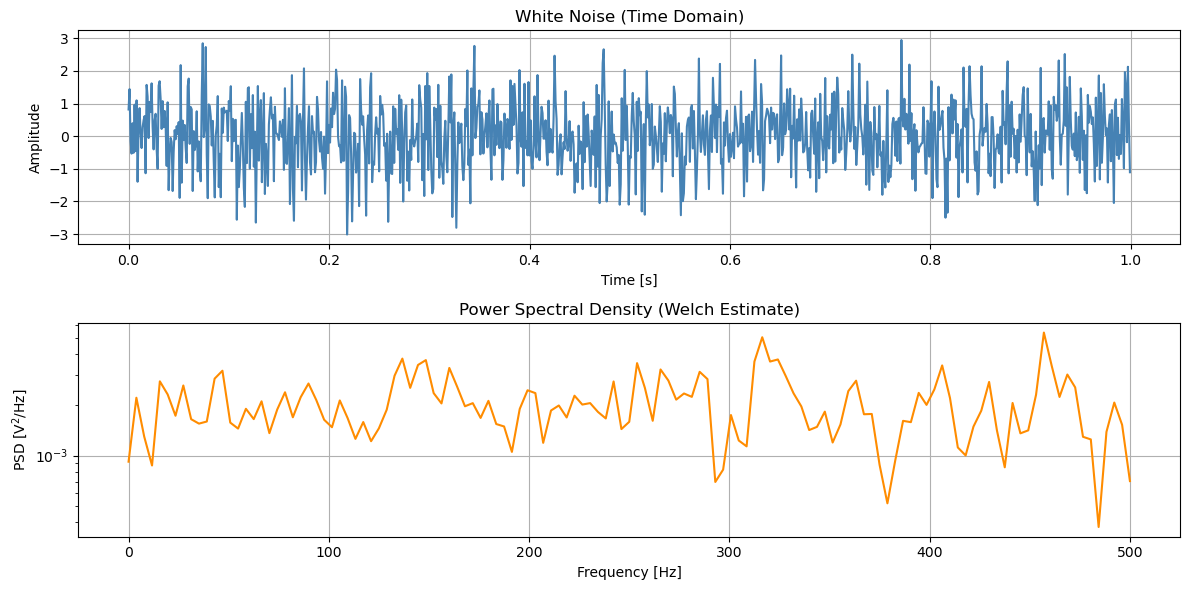

In [3]:
# Parameters
fs = 1000           # Sampling frequency (Hz)
duration = 1.0      # Duration (seconds)
N = int(fs * duration)  # Number of samples

# Generate white noise: zero mean, unit variance
white_noise = np.random.normal(loc=0.0, scale=1.0, size=N)

# Time axis
t = np.linspace(0, duration, N, endpoint=False)

# Plot time-domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, white_noise, color='steelblue')
plt.title('White Noise (Time Domain)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Compute and plot Power Spectral Density using Welch's method
f, Pxx = signal.welch(white_noise, fs, nperseg=256)

plt.subplot(2, 1, 2)
plt.semilogy(f, Pxx, color='darkorange')
plt.title('Power Spectral Density (Welch Estimate)')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'PSD [V$^2$/Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()


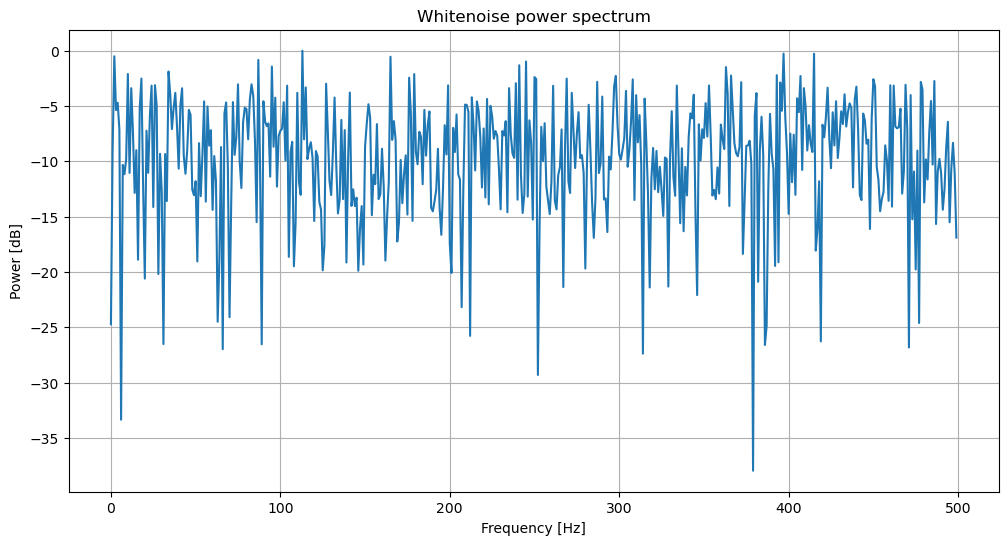

In [4]:
'''
Practice

1. Generate white noise and analyze its power spectrum

Borrow power spectrum plot from previous week's notebook
'''
# Parameters
fs = 1000           # Sampling frequency (Hz)choose sampling frequency for whitenoise
duration = 1.0      # Duration (seconds)
N = int(fs * duration)  # Number of samples

# Generate white noise: zero mean, unit variance
whitenoise = np.random.normal(loc=0.0, scale=1.0, size=N)

d = 1/fs
X_whitenoise = np.fft.fft(whitenoise)
freqs_whitenoise = np.fft.fftfreq(len(whitenoise),d)

# Power spectrum
X_mag = np.abs(X_whitenoise)  # Magnitude of FFT

# Normalize and convert to dB
X_dB_whitenoise = 20 * np.log10(X_mag / np.max(X_mag))

# Common practice to clip to -80 decibels, anything below -100 decibels is machine precision error
X_dB_whitenoise_clipped = np.clip(X_dB_whitenoise, -87, 0)

plt.figure(figsize=(12, 6))
plt.plot(freqs_whitenoise[:N//2],X_dB_whitenoise_clipped[:N//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [dB]')
plt.title(r'Whitenoise power spectrum')
plt.grid()
plt.show()

In [ ]:
'''
2. Implement an autocorrelation function and compare with FFT-methods
'''